In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

In [2]:
from config import api_key
from citipy import citipy

In [3]:
city_df=pd.read_csv("Downloads\cities.csv")

city_df.head()




,City,State
0,New York City,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Philadelphia,Pennsylvania


In [4]:
lat_lngs = []
cities = []


lat_range =(-90, 90)
lng_range =(-180, 180)
lats =np.random.uniform(low=-90.000, high=90.000, size=1250)
lngs =np.random.uniform(low=-180.000, high=180.000, size=1250)
lat_lngs =zip(lats, lngs)

for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)



548

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+ api_key
units = "imperial"

query_url = url +"&units="+ units + "&q="

search =[]
city_ls =[]
country_ls =[]

count = 0

for city in cities:
  try:
    print(f"processing record {count} for city: {city}")
    count+= 1
    response = requests.get(query_url + city)
    jpull =response.json()
    countryName= jpull['sys']['country']
    city_id = jpull['id']
    search.append(jpull)
    city_ls.append(city)
    country_ls.append(countryName)
    
  except Exception as ex:
    print(f"City {city} not found, skipping")
    pass

print("Processing complete")





processing record 0 for city: taolanaro
City taolanaro not found, skipping
processing record 1 for city: lompoc
processing record 2 for city: champerico
processing record 3 for city: cape town
processing record 4 for city: qom
processing record 5 for city: bengkulu
City bengkulu not found, skipping
processing record 6 for city: cherskiy
processing record 7 for city: hobart
processing record 8 for city: atuona
processing record 9 for city: camacha
processing record 10 for city: tuktoyaktuk
processing record 11 for city: doume
City doume not found, skipping
processing record 12 for city: ushuaia
processing record 13 for city: beringovskiy
processing record 14 for city: iqaluit
processing record 15 for city: ust-nera
processing record 16 for city: new norfolk
processing record 17 for city: banda aceh
processing record 18 for city: fortuna
processing record 19 for city: cururupu
processing record 20 for city: polyarnyy
processing record 21 for city: mataura
processing record 22 for city: t

In [6]:
cloudiness_data = [data.get("clouds").get("all") for data in search]
humidity_data = [data.get("main").get("humidity") for data in search]
lat_data =[data.get("coord").get("lat") for data in search]
lng_data =[data.get("coord").get("lng") for data in search]
temp_data =[data.get("main").get("temp") for data in search]
wind_data =[data.get("wind").get("speed") for data in search]

weather_data = pd.DataFrame({"City": city_ls, "country": country_ls, "lat": lat_data, "lng": lng_data, "Temp": temp_data, "Humidity%": humidity_data, "Cloudiness%":cloudiness_data, "Wind%":wind_data  })
weather_data.head()


,City,country,lat,lng,Temp,Humidity%,Cloudiness%,Wind%
0,lompoc,US,34.64,None,71.20,68,1,12.75
1,champerico,MX,16.38,None,86.00,55,40,6.15
2,cape town,ZA,-33.93,None,55.24,76,20,11.41
3,qom,IR,34.64,None,77.68,32,0,4.54
4,cherskiy,RU,68.75,None,40.24,94,100,0.74


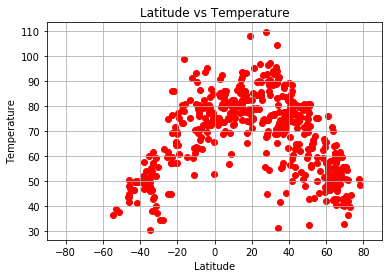

In [8]:
plt.scatter(weather_data["lat"], weather_data["Temp"], marker="o", facecolor= "red")

plt.title("Latitude vs Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("Latitude_vs_Temperature.png")
plt.show()



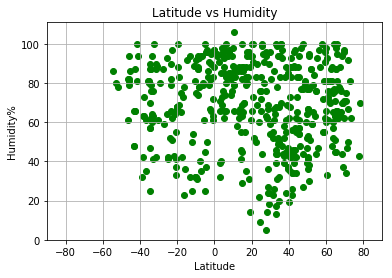

In [9]:
plt.scatter(weather_data["lat"], weather_data["Humidity%"], marker="o", facecolor= "green")

plt.title("Latitude vs Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()



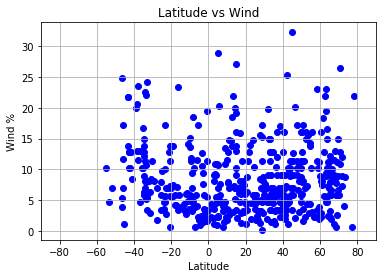

In [10]:
plt.scatter(weather_data["lat"], weather_data["Wind%"], marker="o", facecolor= "blue")

plt.title("Latitude vs Wind")
plt.ylabel("Wind %")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("Latitude_vs_Wind.png")
plt.show()
